# Segmentação de clientes




## Objetivo:

- Aumentar o faturamento da empresa

## Solução

- Identificar grupos de que clientes tenham maior propensão a realizar uma compra e direcionar campanhas específicas a esse grupo.
- Entregar insights para o time de maketing que auxiliem na hora de lançar campanhas, pensando em estratégias para diminuir o intevalo de compra de alguns cliente e reativar clientes que não compram há muito tempo.
- Ter atenddimento diferenciado a clietes que tem perfil com maior média de gasto e pouco intervalo de tempo.

- Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

- Carregando os dados e obtendo informações sobre os mesmos.

In [2]:
dados = pd.read_csv('BancoDeDados.csv',sep=',')

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [4]:
pd.set_option('max_columns',50)
dados.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,15.62,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,7c67e1448b00f6e969d365cea6b010ab,106.99,30.59,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


# EDA

Text(0.5, 1.0, 'Média de gasto por estado')

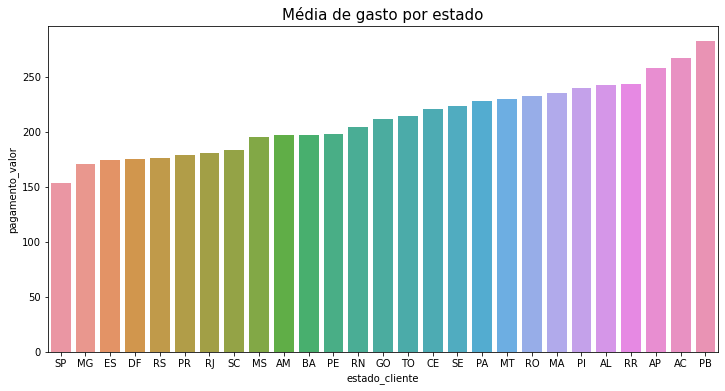

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(x='estado_cliente',y='pagamento_valor',data=dados.groupby('estado_cliente',as_index=False).mean().sort_values(by='pagamento_valor'))


plt.title('Média de gasto por estado',fontsize=15)

- Criando uma função para plotar gráficos.

In [16]:
def plot_perc(st,dados):
    plt.figure(figsize=(20,8))
    
    g = sns.countplot(x=st,data=dados,orient='h')
    g.set_ylabel('Quantidade',fontsize=17)
    
    sizes=[]
    
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x() + p.get_width() / 1.6,
                height+200,
                '{:1.2f}%'.format(height/116581*100),
                ha = 'center',va='bottom', fontsize=12)
        
    g.set_ylim(0,max(sizes)*1.1)

## Plotando um gráfico que mostra a quantidade de clientes por estado

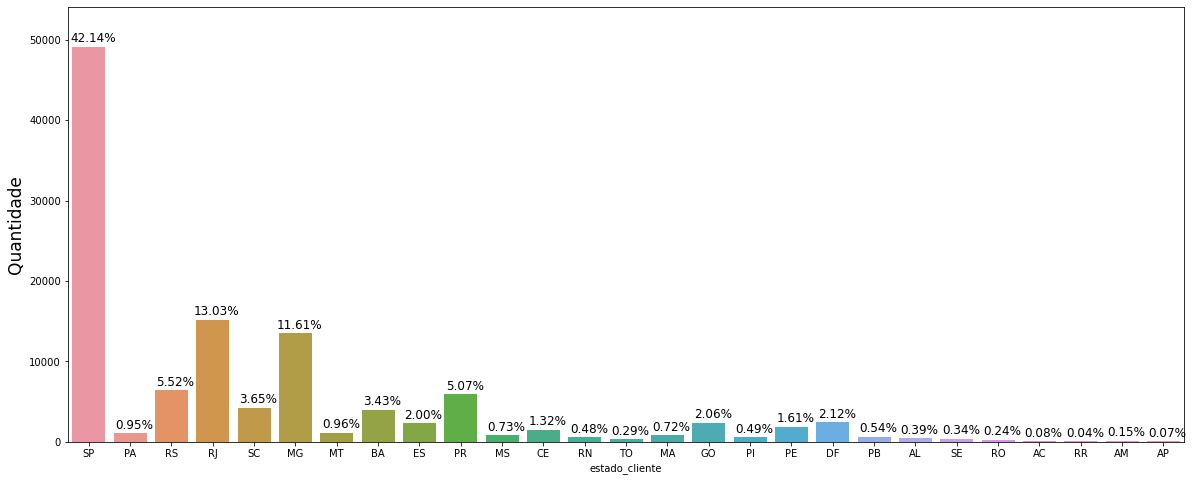

In [17]:
plot_perc('estado_cliente',dados)

Pelo gráfico acima, pode-se concluir que:

- O estado de São Paulo é o que as pessoas mais compram, com 42,14% do total de registros.
- O estado com menos registros de compras é Amapá.
- Estados da região norte e nordeste tendem a fazem menos pedidos, ao contrário das região sul e sudeste.

A partir da análise dos clientes por estado, podemos inferir que provalvelmente, as regiões norte e nordeste comprem menos devido a alguns fatores, como por exemplo:

- Preço do frete
- Tempo de entrega do produto


## Plotando um gráfico que mostra a quantidade de vendedores por estado

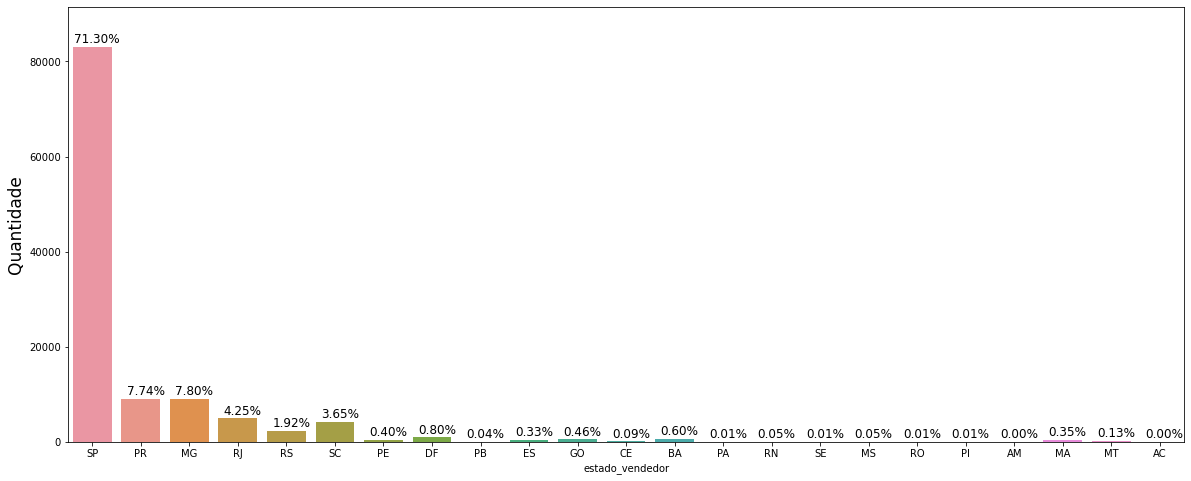

In [18]:
plot_perc('estado_vendedor',dados)

Analisando o gráfico acima pode-se concluir que:
    
- Os vendedores estão concentrados em sua grande maioria no estado de São Paulo, chegando a 71,30% do total dos vendedores.
- Isso fortalece a teoria levantada acima, que os pedidos da região norte e nordeste são em menor quantidade devido ao tempo de entrega e o preço do frete, levantando a hipótese de que se existissem mais vendedores em outras regiões, iria otimizar o serviço, diminuindo os preços de frete e tempo de entrega.


# Analisando os valores  das compras por estado

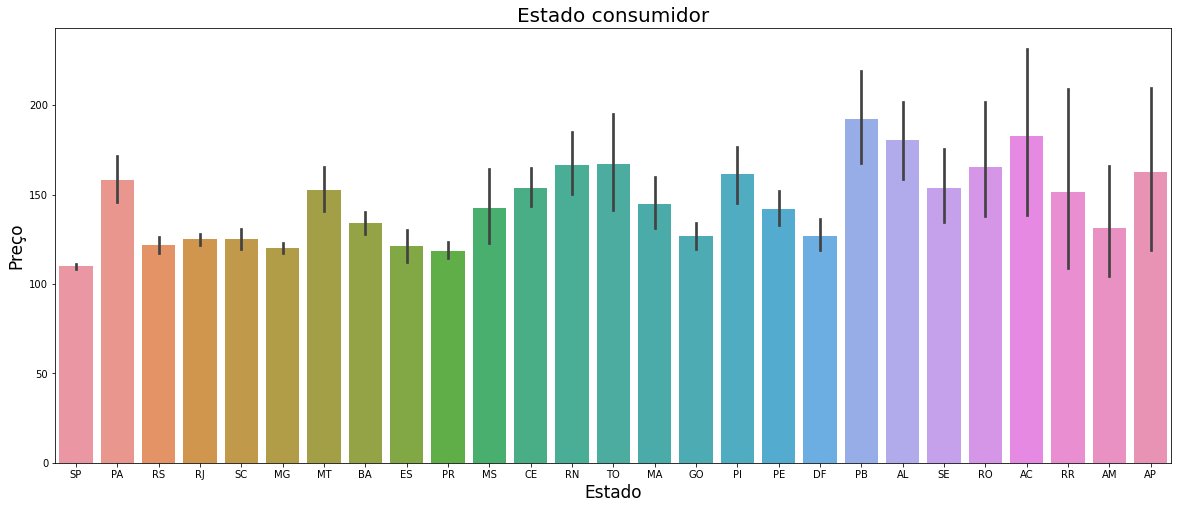

In [19]:
plt.figure(figsize=(20,8))
g2 = sns.barplot(x='estado_cliente',y='preco',data=dados)

g2.set_title("Estado consumidor", fontsize=20)
g2.set_xlabel("Estado",fontsize=17)
g2.set_ylabel("Preço",fontsize=17);

# Analisando os valores de frete por estado

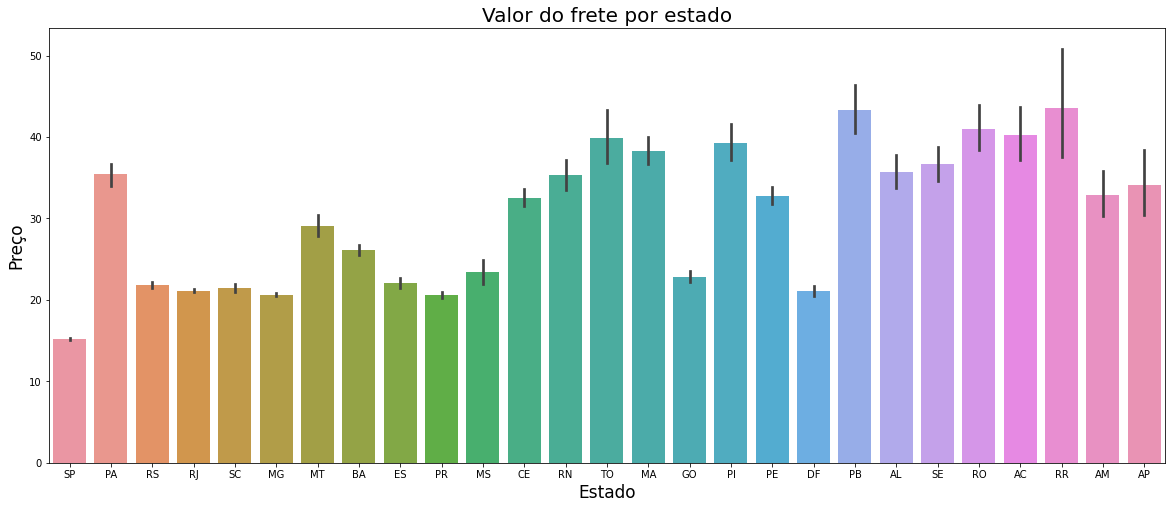

In [20]:
plt.figure(figsize=(20,8))
g2 = sns.barplot(x='estado_cliente',y='frete',data=dados)

g2.set_title("Valor do frete por estado", fontsize=20)
g2.set_xlabel("Estado",fontsize=17)
g2.set_ylabel("Preço",fontsize=17);

## Plotando um gráfico que mostra a a distribuição das  formas de pagamento

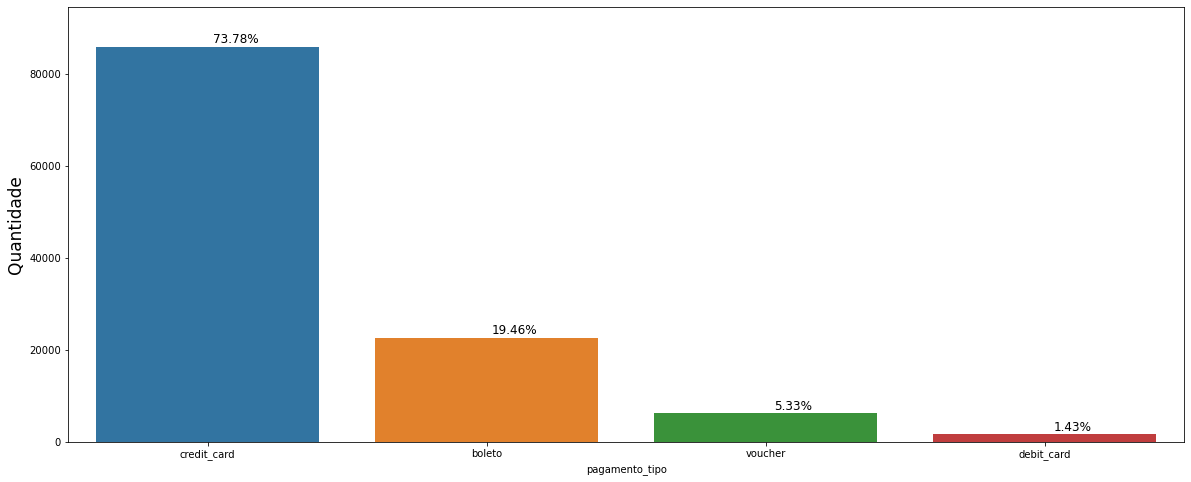

In [21]:
plot_perc('pagamento_tipo',dados)

Analisando o gráfio acima, pode-se concluir que:

- As compras são pagas m sua grande maioria usando cartões de crédito, chegando a 73,78% do total dos pagamentos.
- Devido ao elevado número de compras usando catões de crédito, podem haver também mais casos de fraude.
- Pagamento usando boleto ainda tem uma representatividade grande, chegando a quase 20%.
- Pagamentos a vista, representam uma parcela muito pequena, não chegando nem a 2% do total.


# Utilizando um modelo RFM


## Recência (R)

Há quantos dias foi a última compra desse cliente ?

## Frequência (F)

Quantas compras esse cliente já fes na sua empresa, desde que se cadastrou ?

## Monetaridade (M)

Quanto esse cliente já gastou em dinheiro na sua empresa ?



## Criando um novo Dataset filtrando as informações para fazer a análise RFM

In [22]:
df_olist = dados[['id_unico_cliente','id_cliente','horario_pedido','item_id','preco']]

In [23]:
df_olist.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


- Criando um dataset agrupando pela data máxima da compra

In [24]:
df_compra = dados.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_unico_cliente','DataMaxCompra']

df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra'])

- Criando a variável Recência

In [25]:
df_compra['Recencia'] = (df_compra['DataMaxCompra'].max() - df_compra['DataMaxCompra']).dt.days

In [26]:
df_compra.head()

,id_unico_cliente,DataMaxCompra,Recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


- Unindo os 2 Dataframes

In [27]:
df_usuario = pd.merge(df_olist, df_compra[['id_unico_cliente','Recencia']],on='id_unico_cliente')

df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


Acima temos o dataset oriundo das transformações feitas no datase original, onde primeiro selecionei apenas as colunas que diziam respeito ao cliente, produto, preço e horário da compra, e depois criei outro dataset contendo apenas a o id único por cliente e a última data que foi feita uma compra, para criar a variável Recência que diz há quantos dias foi feita a última compra, então uni  os 2 dataset trazendo todas as informações necssárias para segmentar os clientes.

In [28]:
df_usuario.describe()

,item_id,preco,Recencia
count,116581.000000,116581.000000,116581.000000
mean,1.196953,120.751369,242.646623
std,0.701350,183.848421,153.112319
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,118.000000
50%,1.000000,74.900000,223.000000
75%,1.000000,134.900000,352.000000
max,21.000000,6735.000000,728.000000


Analisando os dados acima, obtidos por meio da função describe do pandas, pode-se perceber que:

- Mais de 75% dos produtos comprados tem valor abaixo de 134,90.
- 25% dos clientes fizeram  uma compra nos últimos 4 meses.
- 50% dos clientes fizeram  uma compra há 223 dias.
- 75% dos clientes fizeram  uma compra há quase um ano.
- 25% dos clientesfizeram  uma compra há quase 2 anos.


# Clusterização


## KMeans

## Calculando o melhor número de clusters

In [31]:
from sklearn.cluster import KMeans

In [61]:
import sys
import warnings
    
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [30]:
def calcular_wcss(data):
    wcss = []
    for k in  range(1,10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X=data)
        data['Clusters'] = kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

Selecinando apenas a variável Recência para criar clusters a partir dessa variável.

In [32]:
df_recencia = df_usuario[['Recencia']]
df_recencia.head()

,Recencia
0,474
1,298
2,298
3,483
4,211


In [33]:
soma_quadrados = calcular_wcss(df_recencia)

In [37]:
import math
def numero_otimo_clusters(wcss):
    x1, y1 = 2,wcss[0]
    x2, y2 = 20,wcss[len(wcss)-1]
    
    distancia = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerador = abs((y2 - y1)*x0 -(x2 - x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancia.append(numerador/denominador)
    return distancia.index(max(distancia)) + 2

In [38]:
n = numero_otimo_clusters(soma_quadrados)
n

4

Plotandoo gráfico para analisar o melhor número de clusters

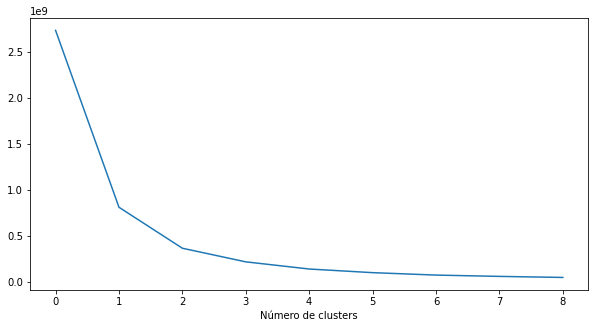

In [39]:
plt.figure(figsize=(10,5))
plt.plot(soma_quadrados)
plt.xlabel('Número de clusters')
plt.show()

Método da silhueta

In [73]:
# from sklearn.metrics import silhouette_score
# for nc in range(2, 11):
#   print('Numero de Clusters', nc)
#   kmeans = KMeans(n_clusters=nc)
#   kmeans.fit(df_recencia)
#   labels = kmeans.labels_
#   ss=silhouette_score(df_recencia, labels)
#   print('Silhouette Score', ss)
#   print('='*80)

In [77]:
# for i in range(2, 11):
#   cluster = KMeans(n_clusters=i)
#   preds = cluster.fit_predict(df_recencia)
#   score = silhouette_score(df_recencia, preds)
#   print('Silhouette Score para ' + str(i) + ' clusters : ' + str(score))
#   print('='*80)

## Criando variáveis



## Recência

Aplicando o número de clusters ideal para criar a variável RecenciaCluster

In [40]:
kmeans = KMeans(n_clusters=4)
df_usuario['RecenciaCluster'] = kmeans.fit_predict(df_recencia)

df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,3
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,3
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,0


- Criando uma função para ordenar a variável RecenciaCluster

In [41]:
def ordenador_cluster(cluster_nome,target_nome,df):
    agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_por_cluster = agrupado_por_cluster.sort_values(by=target_nome,ascending=False).reset_index(drop=True)
    agrupado_por_cluster['index'] = agrupado_por_cluster.index
    juntando_cluster = pd.merge(df, agrupado_por_cluster[[cluster_nome,'index']],on=cluster_nome)
    df_final = juntando_cluster.drop([cluster_nome], axis=1)
    df_final = df_final.rename(columns={'index':cluster_nome})
    return df_final

In [42]:
df_usuario = ordenador_cluster('RecenciaCluster','Recencia',df_usuario)

df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [43]:
df_usuario.groupby('RecenciaCluster')['Recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
RecenciaCluster,,,,,,,,
0,20324.0,490.622269,59.293154,406.0,444.0,481.0,533.0,728.0
1,30828.0,320.233294,43.971639,255.0,281.0,314.0,357.0,405.0
2,33639.0,187.911204,35.134736,128.0,158.0,187.0,218.0,254.0
3,31790.0,66.790878,36.009443,0.0,33.0,67.0,100.0,127.0


Ao aplicar a função acima, ela retorna um dataset com a coluna RecenciaCLuster ordenada de acordo com a quantidade de dias que cada usuário demora para comprar.

É atribuída uma nota de 0 a 3 para cada cliente.

Quanto maior o intervalo para comprar mais baixa é a nota.


## Frequência

Aplicando o número de clusters ideal para criar a variável FrequenciaCluster

Criando a variável frequência

In [44]:
df_frequencia = dados.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
df_frequencia.columns = ['id_unico_cliente','Frequencia']
df_frequencia.head()

,id_unico_cliente,Frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


Adicionando a variável frequencia ao dataset

In [45]:
df_usuario = pd.merge(df_usuario, df_frequencia,on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1


- Clustererizando  pela frquência

In [46]:
df_frequencia = df_usuario[['Frequencia']]
kmeans = KMeans(n_clusters=4)
df_usuario['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)

Ordenando o cluster de frequência

In [48]:
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,619.0,22.844911,6.267127,15.0,19.0,22.0,24.0,38.0
2,9317.0,5.744875,2.312449,4.0,4.0,5.0,6.0,14.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


Como pode ser obseervado os valores médios não seguem uma ordem, então irei utilizar a função criada anteriormente para ordenar.

Utilizando a funçao ja criada para ordenar os clusters

In [50]:
def ordenador_cluster(cluster_nome,target_nome,df):
    agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_por_cluster = agrupado_por_cluster.sort_values(by=target_nome,ascending=True).reset_index(drop=True)
    agrupado_por_cluster['index'] = agrupado_por_cluster.index
    juntando_cluster = pd.merge(df, agrupado_por_cluster[[cluster_nome,'index']],on=cluster_nome)
    df_final = juntando_cluster.drop([cluster_nome], axis=1)
    df_final = df_final.rename(columns={'index':cluster_nome})
    return df_final

In [51]:
df_usuario = ordenador_cluster('FrequenciaCluster','Frequencia',df_usuario)

In [52]:
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9317.0,5.744875,2.312449,4.0,4.0,5.0,6.0,14.0
2,619.0,22.844911,6.267127,15.0,19.0,22.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


Como pode ser observado acima, os clusters de frequência estao ordenados de acordo com a média de compras, recebendo nota 3 aqueles clientes que tiveram maior média e nota 0 os que tiveram  a menor média.

## Receita

Aplicando o número de clusters ideal para criar a variável ReceitaCluster

In [53]:
df_receita = dados.groupby('id_unico_cliente').pagamento_valor.sum().reset_index()
df_receita.columns = ['id_unico_cliente','Receita']
df_receita.head()

,id_unico_cliente,Receita
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


Adicionando a variável frequencia ao dataset

In [54]:
df_usuario = pd.merge(df_usuario, df_receita,on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33


- Clustererizando a Receita


In [55]:
df_receita = df_usuario[['Receita']]
kmeans = KMeans(n_clusters=4)
df_usuario['ReceitaCluster'] = kmeans.fit_predict(df_receita)

Ordenando o cluster de Receita

In [57]:
df_usuario.groupby('ReceitaCluster')['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,114759.0,258.001303,364.552930,9.59,69.90,132.57,269.08,2943.84
1,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
2,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64
3,1623.0,5643.398515,2881.557862,2949.52,3555.36,4491.44,6907.05,16313.60


Utilizando a funçao ja criada para ordenar os clusters

In [58]:
df_usuario = ordenador_cluster('ReceitaCluster','Receita',df_usuario)

In [59]:
df_usuario.groupby('ReceitaCluster')['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,114759.0,258.001303,364.552930,9.59,69.90,132.57,269.08,2943.84
1,1623.0,5643.398515,2881.557862,2949.52,3555.36,4491.44,6907.05,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


Como pode ser observado acima, os clusters de receita estao ordenados de acordo com a média de gasto, recebendo nota 3 aqueles clientes que tiveram maior média e nota 0 os que tiveram a menor média.

In [60]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33,0


# Criando um Dataset final

Neste tópico vou selecionar apenas a colunas referentes a Recência, Frequência e Receita e criar duas novas variáveis, onde uma atribui uma pontuação para cada usuário e a outra avalia essa pontuação em algumas categorias

In [88]:
df_final = df_usuario[['id_unico_cliente','Recencia','RecenciaCluster','Frequencia','FrequenciaCluster','Receita','ReceitaCluster']]

df_final['Pontuacao'] = df_final['RecenciaCluster'] + df_final['FrequenciaCluster'] + df_final['ReceitaCluster']

df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0,0
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0,0
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0,0
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0,0


Criando uma segmentaçao de acordo com a pontuação geral de cada cliente

In [89]:
df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['Pontuacao']>=1,'Segmento'] = 'Business'
df_final.loc[df_final['Pontuacao']>=3,'Segmento'] = 'Master'
df_final.loc[df_final['Pontuacao']>=5,'Segmento'] = 'Premium'


df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao,Segmento
116576,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116577,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116578,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116579,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116580,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium


Salvando o dataset em  um novo arquivo csv

In [70]:
df_final.to_csv('dados_RFM.csv',index=False)

# Conclusão

Criando uma função para visualização da segmentação dos clientes

In [78]:
def plot_segmento(x,y,data):
    sns.set(palette='muted',color_codes=True, style='whitegrid')
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x,y=y,hue='Segmento',data=data, size='Segmento',sizes=(50,150),size_order=['Premium','Master','Business','Inativo'])
    plt.show()

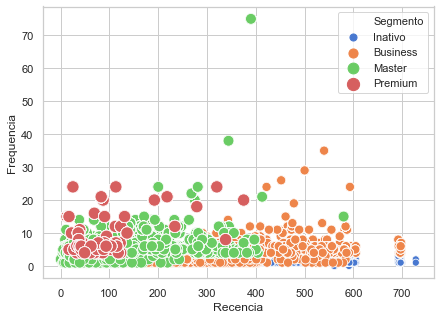

In [80]:
plot_segmento('Recencia','Frequencia',df_final)

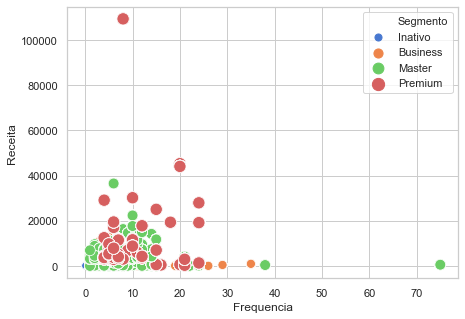

In [81]:
plot_segmento('Frequencia','Receita',df_final)

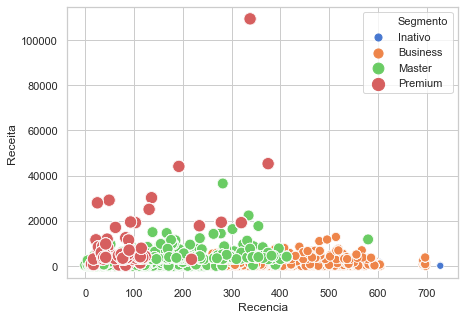

In [82]:
plot_segmento('Recencia','Receita',df_final)

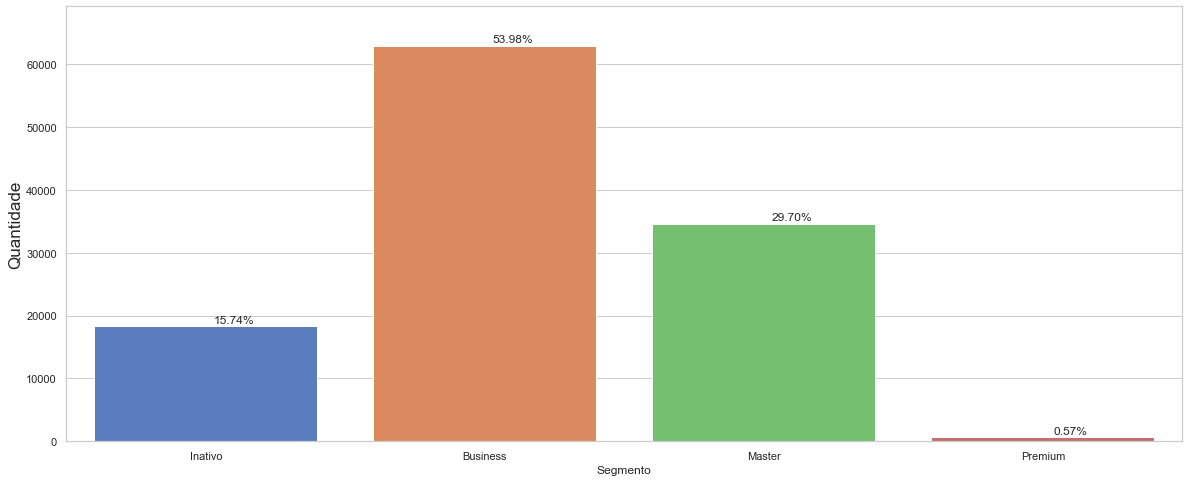

In [91]:
plot_perc('Segmento',df_final)